<a href="https://colab.research.google.com/github/mashin0714/bootcamp2/blob/main/Sales%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.metrics as metrics


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier, AdaBoostClassifier

In [108]:
!git clone https://github.com/mashin0714/bootcamp2.git

fatal: destination path 'bootcamp2' already exists and is not an empty directory.


In [109]:
sales = pd.read_csv('bootcamp2/train 2.csv', nrows = 1000)

In [110]:
sales.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [111]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1000 non-null   int64  
 1   Product_ID                  1000 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Age                         1000 non-null   object 
 4   Occupation                  1000 non-null   int64  
 5   City_Category               1000 non-null   object 
 6   Stay_In_Current_City_Years  1000 non-null   object 
 7   Marital_Status              1000 non-null   int64  
 8   Product_Category_1          1000 non-null   int64  
 9   Product_Category_2          704 non-null    float64
 10  Product_Category_3          324 non-null    float64
 11  Purchase                    1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [112]:
sales.isnull().sum()

User_ID                         0
Product_ID                      0
Gender                          0
Age                             0
Occupation                      0
City_Category                   0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2            296
Product_Category_3            676
Purchase                        0
dtype: int64

In [113]:
sales_2 = sales.fillna(0)

In [114]:
sales_2 = sales_2.drop(columns = 'User_ID')

In [115]:
sales_2 = sales_2.drop(columns = 'Product_ID')

In [116]:
sales_2

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...
995,M,26-35,11,C,1,1,1,15.0,16.0,19696
996,M,26-35,11,C,1,1,1,8.0,17.0,15745
997,F,51-55,17,B,1,1,2,4.0,5.0,16018
998,M,26-35,3,C,2,0,10,13.0,16.0,14070


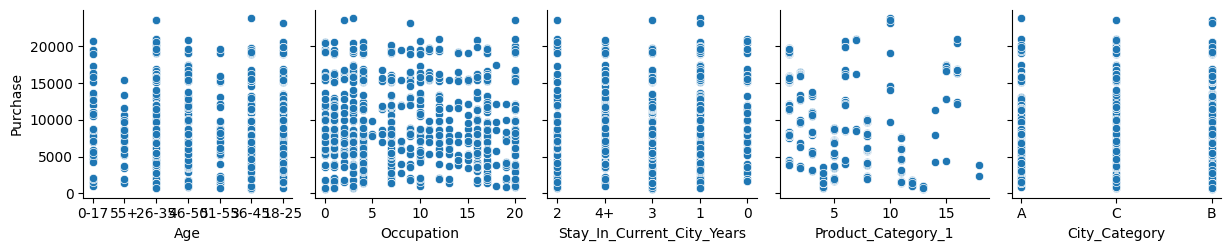

In [117]:
# not continuous / age is discrete
sns.pairplot(sales_2, x_vars=["Age", "Occupation", "Stay_In_Current_City_Years", 'Product_Category_1', 'City_Category'], y_vars="Purchase")

<Axes: xlabel='Occupation', ylabel='Purchase'>

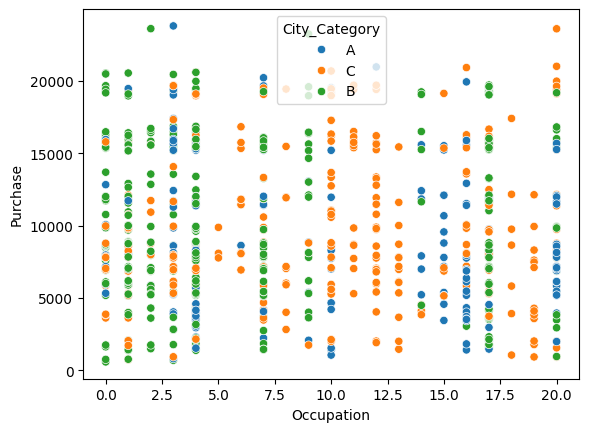

In [118]:
sns.scatterplot(sales_2, x="Occupation", y = 'Purchase', hue ='City_Category')

In [119]:
avg_purchase_by_age = sales_2.groupby('Age')['Purchase'].mean()

<Axes: xlabel='Age'>

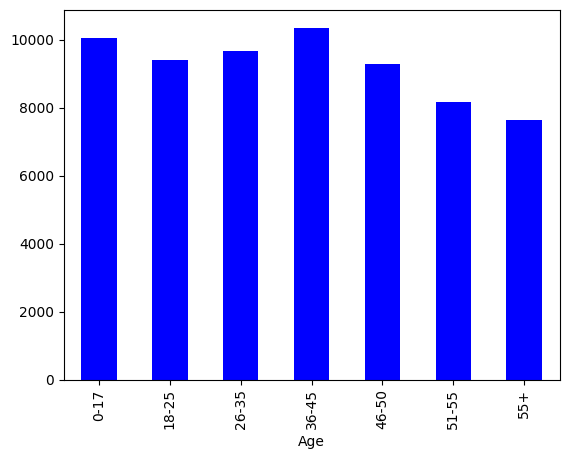

In [120]:
avg_purchase_by_age.plot(kind='bar', color='blue')

<Axes: xlabel='City_Category', ylabel='Purchase'>

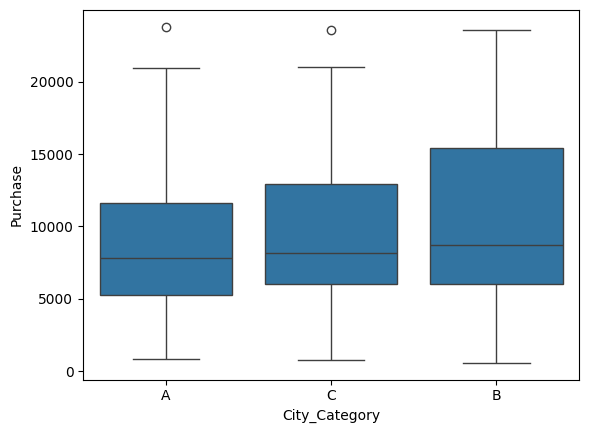

In [121]:
sns.boxplot(data=sales_2, x='City_Category', y='Purchase')

<Axes: xlabel='Product_Category_1'>

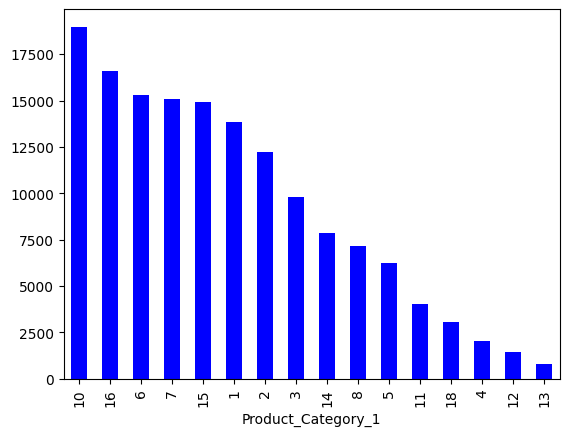

In [122]:
avg_purchase_by_category = sales_2.groupby('Product_Category_1')['Purchase'].mean()
avg_purchase_by_category.sort_values(ascending=False).plot(kind = 'bar', color= 'blue')

<Axes: xlabel='City_Category'>

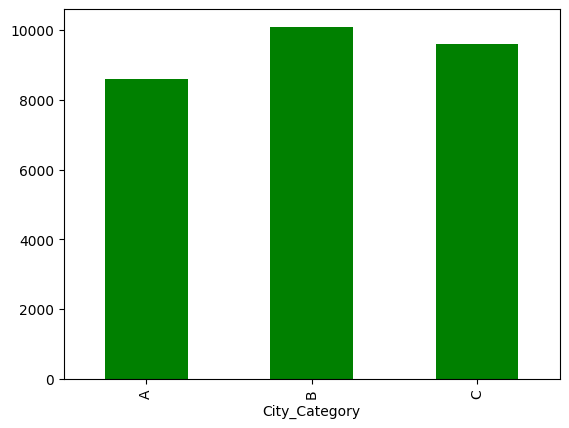

In [123]:
avg_purchase_by_occupation = sales_2.groupby('City_Category')['Purchase'].mean()
avg_purchase_by_occupation.plot(kind = 'bar', color = 'green')

In [124]:
sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      1000 non-null   object 
 1   Age                         1000 non-null   object 
 2   Occupation                  1000 non-null   int64  
 3   City_Category               1000 non-null   object 
 4   Stay_In_Current_City_Years  1000 non-null   object 
 5   Marital_Status              1000 non-null   int64  
 6   Product_Category_1          1000 non-null   int64  
 7   Product_Category_2          1000 non-null   float64
 8   Product_Category_3          1000 non-null   float64
 9   Purchase                    1000 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [125]:
sales_2['Stay_In_Current_City_Years'].value_counts()

1     313
3     246
4+    203
2     141
0      97
Name: Stay_In_Current_City_Years, dtype: int64

In [126]:
sales_2['Stay_In_Current_City_Years'] = sales_2['Stay_In_Current_City_Years'].replace('4+', 4)

In [127]:
sales_2['Gender'] = sales_2['Gender'].replace(['F','M'], [0, 1])

In [128]:
sales_2['Age'].value_counts()

26-35    341
18-25    214
36-45    200
46-50    121
51-55     54
0-17      42
55+       28
Name: Age, dtype: int64

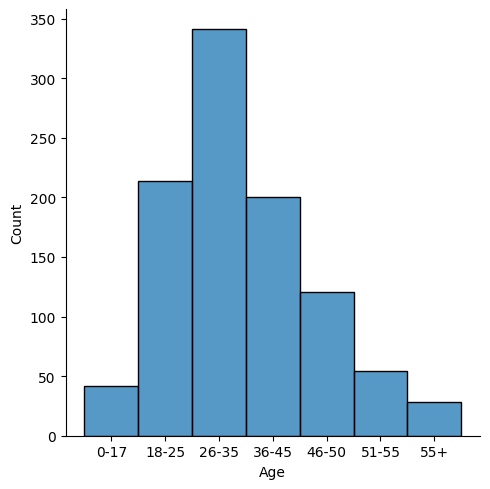

In [129]:
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

sales_2_sorted = sales_2[sales_2['Age'].isin(age_order)]
sales_2_sorted['Age'] = pd.Categorical(sales_2_sorted['Age'], categories=age_order, ordered=True)

# Plot the displot with the sorted DataFrame
sns.displot(data=sales_2_sorted, x='Age', discrete=True)

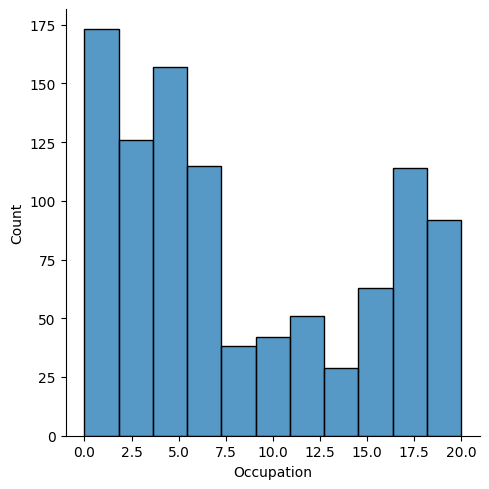

In [130]:
sns.displot(sales_2, x = 'Occupation')

In [131]:
sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      1000 non-null   int64  
 1   Age                         1000 non-null   object 
 2   Occupation                  1000 non-null   int64  
 3   City_Category               1000 non-null   object 
 4   Stay_In_Current_City_Years  1000 non-null   object 
 5   Marital_Status              1000 non-null   int64  
 6   Product_Category_1          1000 non-null   int64  
 7   Product_Category_2          1000 non-null   float64
 8   Product_Category_3          1000 non-null   float64
 9   Purchase                    1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.2+ KB


correct the datatype.

In [132]:
sales_2['Stay_In_Current_City_Years'] = pd.to_numeric(sales_2['Stay_In_Current_City_Years'], errors='coerce')

In [133]:
sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      1000 non-null   int64  
 1   Age                         1000 non-null   object 
 2   Occupation                  1000 non-null   int64  
 3   City_Category               1000 non-null   object 
 4   Stay_In_Current_City_Years  1000 non-null   int64  
 5   Marital_Status              1000 non-null   int64  
 6   Product_Category_1          1000 non-null   int64  
 7   Product_Category_2          1000 non-null   float64
 8   Product_Category_3          1000 non-null   float64
 9   Purchase                    1000 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 78.2+ KB


In [134]:
sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      1000 non-null   int64  
 1   Age                         1000 non-null   object 
 2   Occupation                  1000 non-null   int64  
 3   City_Category               1000 non-null   object 
 4   Stay_In_Current_City_Years  1000 non-null   int64  
 5   Marital_Status              1000 non-null   int64  
 6   Product_Category_1          1000 non-null   int64  
 7   Product_Category_2          1000 non-null   float64
 8   Product_Category_3          1000 non-null   float64
 9   Purchase                    1000 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 78.2+ KB


In [135]:
sales_2['City_Category'].value_counts()

B    417
C    360
A    223
Name: City_Category, dtype: int64

In [136]:
objects = []
for c in sales_2.columns:
    if str(sales_2[c].dtype) == 'object':
        objects.append(c)

X_ = sales_2.drop(objects, axis = 1).astype('float64')
dummies = pd.get_dummies(sales_2[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
X

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,0.0,10.0,2.0,0.0,3.0,0.0,0.0,8370.0,0,0,0,0,0,0,0,0
1,0.0,10.0,2.0,0.0,1.0,6.0,14.0,15200.0,0,0,0,0,0,0,0,0
2,0.0,10.0,2.0,0.0,12.0,0.0,0.0,1422.0,0,0,0,0,0,0,0,0
3,0.0,10.0,2.0,0.0,12.0,14.0,0.0,1057.0,0,0,0,0,0,0,0,0
4,1.0,16.0,4.0,0.0,8.0,0.0,0.0,7969.0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,11.0,1.0,1.0,1.0,15.0,16.0,19696.0,0,1,0,0,0,0,0,1
996,1.0,11.0,1.0,1.0,1.0,8.0,17.0,15745.0,0,1,0,0,0,0,0,1
997,0.0,17.0,1.0,1.0,2.0,4.0,5.0,16018.0,0,0,0,0,1,0,1,0
998,1.0,3.0,2.0,0.0,10.0,13.0,16.0,14070.0,0,1,0,0,0,0,0,1


In [137]:
category_dummies = pd.get_dummies(X['Product_Category_1'], drop_first = True, prefix = 'category')
sales_3 = X.drop(columns = 'Product_Category_1')
sales_f = pd.concat([sales_3, category_dummies], axis = 1)

In [138]:
sales_f

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Purchase,Age_18-25,Age_26-35,Age_36-45,...,category_7.0,category_8.0,category_10.0,category_11.0,category_12.0,category_13.0,category_14.0,category_15.0,category_16.0,category_18.0
0,0.0,10.0,2.0,0.0,0.0,0.0,8370.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,10.0,2.0,0.0,6.0,14.0,15200.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,10.0,2.0,0.0,0.0,0.0,1422.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,10.0,2.0,0.0,14.0,0.0,1057.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,16.0,4.0,0.0,0.0,0.0,7969.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,11.0,1.0,1.0,15.0,16.0,19696.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
996,1.0,11.0,1.0,1.0,8.0,17.0,15745.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
997,0.0,17.0,1.0,1.0,4.0,5.0,16018.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,1.0,3.0,2.0,0.0,13.0,16.0,14070.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [139]:
np.random.seed(42)
train, test = train_test_split(sales_f, test_size = 0.5)
val, test = train_test_split(test, test_size = 0.5)
X_train = train.drop(['Purchase'], axis=1)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
y_train = train['Purchase'].values

X_val = val.drop(['Purchase'], axis=1)
X_val = scaler.transform(X_val)
y_val = val['Purchase'].values
X_test = test.drop(['Purchase'], axis=1)
X_test = scaler.transform(X_test)
y_test = test['Purchase'].values

<Axes: >

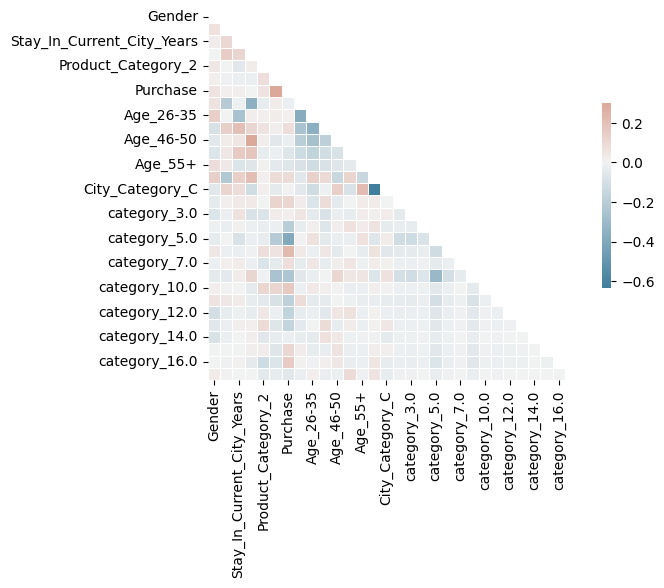

In [140]:
mask = np.triu(np.ones_like(sales_f.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(sales_f.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Linear Regression

In [141]:
y_ols = sales_f['Purchase']
X_ols = sales_f.drop(columns = ['Purchase'])
X_ols = sm.add_constant(X_ols)

model_ = sm.OLS(y_ols, X_ols).fit()
# Check regression results
print(model_.params)

const                         14748.998464
Gender                         -463.979463
Occupation                      -21.669808
Stay_In_Current_City_Years      -72.080688
Marital_Status                  135.778486
Product_Category_2               10.960338
Product_Category_3               -9.636638
Age_18-25                     -1262.720662
Age_26-35                      -809.854214
Age_36-45                      -846.765966
Age_46-50                      -657.467149
Age_51-55                     -1271.164726
Age_55+                        -931.178133
City_Category_B                 811.743999
City_Category_C                 922.858181
category_2.0                  -1760.280217
category_3.0                  -4379.171153
category_4.0                 -12035.802661
category_5.0                  -7744.918733
category_6.0                   1384.530841
category_7.0                    971.033038
category_8.0                  -6897.133459
category_10.0                  4946.419560
category_11

In [142]:
model_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     58.53
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          1.84e-190
Time:                        04:55:22   Log-Likelihood:                -9453.7
No. Observations:                1000   AIC:                         1.897e+04
Df Residuals:                     970   BIC:                         1.911e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       1.475e+04    629.839     23.417      0.000    1.35e+04     1.6e+04
Gender                      -463.9795    234.911     -1.975      0.049    -924.972      -2.987
Occupation                   -21.6698     16.585     -1.307      0.192     -54.216      10.877
Stay_In_Current_City_Years   -72.0807     84.236     -0.856      0.392    -237.386      93.224
Marital_Status               135.7785    243.025      0.559      0.576    -341.138     612.695
Product_Category_2            10.9603     16.948      0.647      0.518     -22.298      44.219
Product_Category_3            -9.6366     18.209     -0.529      0.597     -45.370      26.096
Age_18-25                  -1262.7207    559.324     -2.258      0.024   -2360.346    -165.096
Age_26-35                   -809.8542    566.259     -1.430      0.153   -1921.087     301.379
Age_36-45                   -846.7660    582.987     -1.452      0.147   -1990.828     297.296
Age_46-50                   -657.4671    624.573     -1.053      0.293   -1883.138     568.204
Age_51-55                  -1271.1647    703.313     -1.807      0.071   -2651.355     109.025
Age_55+                     -931.1781    805.434     -1.156      0.248   -2511.772     649.416
City_Category_B              811.7440    298.205      2.722      0.007     226.542    1396.946
City_Category_C              922.8582    284.403      3.245      0.001     364.743    1480.974
category_2.0               -1760.2802    539.528     -3.263      0.001   -2819.057    -701.503
category_3.0               -4379.1712    525.922     -8.327      0.000   -5411.247   -3347.095
category_4.0               -1.204e+04    776.117    -15.508      0.000   -1.36e+04   -1.05e+04
category_5.0               -7744.9187    293.979    -26.345      0.000   -8321.827   -7168.011
category_6.0                1384.5308    537.476      2.576      0.010     329.780    2439.281
category_7.0                 971.0330   1435.650      0.676      0.499   -1846.305    3788.371
category_8.0               -6897.1335    320.472    -21.522      0.000   -7526.031   -6268.235
category_10.0               4946.4196   1132.860      4.366      0.000    2723.282    7169.558
category_11.0              -9616.9081    650.604    -14.782      0.000   -1.09e+04   -8340.155
category_12.0               -1.29e+04    985.043    -13.095      0.000   -1.48e+04    -1.1e+04
category_13.0               -1.36e+04   1084.340    -12.545      0.000   -1.57e+04   -1.15e+04
category_14.0              -6187.4723   1847.348     -3.349      0.001   -9812.731   -2562.214
category_15.0                726.5577   1024.305      0.709      0.478   -1283.551    2736.666
category_16.0               2642.5487    915.291      2.887      0.004     846.369    4438.728
category_18.0              -1.074e+04   224

In [143]:
y_ols = sales_f['Purchase']
X_ols_2 = sales_f.drop(columns = ['Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_2', 'Product_Category_3','category_7.0','category_12.0'])
X_ols_2 = sm.add_constant(X_ols_2)

model_2 = sm.OLS(y_ols, X_ols_2).fit()
# Check regression results
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.393e+31
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        04:55:22   Log-Likelihood:                 24618.
No. Observations:                1000   AIC:                        -4.919e+04
Df Residuals:                     975   BIC:                        -4.906e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.307e-12   1.12e-12      1.170      0.242   -8.85e-13     3.5e-12
Gender           1.265e-12    3.7e-13      3.421      0.001    5.39e-13    1.99e-12
Occupation      -4.974e-14   2.59e-14     -1.922      0.055   -1.01e-13    1.04e-15
Purchase            1.0000    4.7e-17   2.13e+16      0.000       1.000       1.000
Age_18-25        1.492e-12   8.85e-13      1.686      0.092   -2.45e-13    3.23e-12
Age_26-35        9.663e-13   8.74e-13      1.105      0.269    -7.5e-13    2.68e-12
Age_36-45        3.752e-12   9.04e-13      4.152      0.000    1.98e-12    5.52e-12
Age_46-50        1.876e-12   9.31e-13      2.016      0.044    4.98e-14     3.7e-12
Age_51-55        5.571e-12   1.08e-12      5.143      0.000    3.44e-12     7.7e-12
Age_55+         -3.411e-13   1.26e-12     -0.270      0.787   -2.82e-12    2.14e-12
City_Category_B -4.093e-12   4.51e-13     -9.080      0.000   -4.98e-12   -3.21e-12
City_Category_C -4.263e-13   4.41e-13     -0.966      0.334   -1.29e-12     4.4e-13
category_2.0     1.819e-12   8.56e-13      2.125      0.034    1.39e-13     3.5e-12
category_3.0     4.434e-12   8.41e-13      5.270      0.000    2.78e-12    6.08e-12
category_4.0     3.411e-13   1.33e-12      0.256      0.798   -2.27e-12    2.96e-12
category_5.0     1.336e-12    5.4e-13      2.472      0.014    2.75e-13     2.4e-12
category_6.0             0   8.53e-13          0      1.000   -1.67e-12    1.67e-12
category_8.0     1.833e-12   5.44e-13      3.370      0.001    7.66e-13     2.9e-12
category_10.0    4.547e-13    1.8e-12      0.252      0.801   -3.09e-12    3.99e-12
category_11.0    2.046e-12    1.1e-12      1.867      0.062   -1.04e-13     4.2e-12
category_13.0    1.705e-13   1.81e-12      0.094      0.925   -3.37e-12    3.71e-12
category_14.0    4.434e-12   2.93e-12      1.512      0.131   -1.32e-12    1.02e-11
category_15.0    2.274e-13   1.61e-12      0.141      0.888   -2.93e-12    3.39e-12
category_16.0    3.411e-13   1.42e-12      0.240      0.811   -2.45e-12    3.13e-12
category_18.0   -1.364e-12   3.59e-12     -0.380      0.704    -8.4e-12    5.67e-12
==============================================================================
Omnibus:                       80.133   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.918
Skew:                           0.756   Prob(JB):                     5.46e-22
Kurtosis:                       3.258   Cond. No.                     2.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [144]:
X_train.shape

(500, 29)

In [145]:
X_test.shape

(250, 29)

In [150]:
X_train = sm.add_constant(X_train)
model_3 = sm.OLS(y_train, X_train).fit()
# Check regression results
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     25.49
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.03e-76
Time:                        04:58:51   Log-Likelihood:                -4725.4
No. Observations:                 500   AIC:                             9509.
Df Residuals:                     471   BIC:                             9631.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9398.5600    141.798     66.281      0.000    9119.925    9677.195
x1            -4.0037    153.688     -0.026      0.979    -306.003     297.996
x2          -202.0383    156.876     -1.288      0.198    -510.302     106.225
x3           -60.9058    160.470     -0.380      0.704    -376.232     254.421
x4           231.3094    169.858      1.362      0.174    -102.464     565.083
x5           143.8708    148.691      0.968      0.334    -148.310     436.051
x6          -159.0185    163.830     -0.971      0.332    -480.947     162.910
x7           -21.0136    419.109     -0.050      0.960    -844.569     802.542
x8           157.7202    501.225      0.315      0.753    -827.194    1142.634
x9           233.3542    446.647      0.522      0.602    -644.314    1111.022
x10          131.7288    376.312      0.350      0.726    -607.730     871.187
x11            0.6069    273.158      0.002      0.998    -536.153     537.367
x12          -34.5460    226.036     -0.153      0.879    -478.710     409.618
x13          251.4803    217.626      1.156      0.248    -176.158     679.118
x14          358.1884    200.074      1.790      0.074     -34.960     751.337
x15         -286.5865    147.514     -1.943      0.053    -576.454       3.281
x16         -617.8101    154.039     -4.011      0.000    -920.499    -315.121
x17        -1635.9173    150.014    -10.905      0.000   -1930.696   -1341.139
x18        -3004.7229    184.041    -16.326      0.000   -3366.365   -2643.081
x19          331.3833    148.455      2.232      0.026      39.667     623.100
x20         5.258e-14   4.42e-14      1.190      0.235   -3.43e-14    1.39e-13
x21        -2551.9070    182.355    -13.994      0.000   -2910.238   -2193.576
x22          556.7016    144.182      3.861      0.000     273.381     840.022
x23        -1415.4454    150.315     -9.417      0.000   -1710.817   -1120.074
x24        -1308.7980    147.539     -8.871      0.000   -1598.714   -1018.882
x25        -1317.0398    147.112     -8.953      0.000   -1606.117   -1027.963
x26         -245.5161    145.976     -1.682      0.093    -532.362      41.330
x27          245.6755    146.170      1.681      0.093     -41.551     532.902
x28          196.2659    148.371      1.323      0.187     -95.284     487.816
x29         -429.8401    143.672     -2.992      0.003    -712.158    -147.522
==============================================================================
Omnibus:                       33.285   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.257
Skew:                          -0.575   Prob(JB):                     1.10e-09
Kurtosis:                       3.810   Cond. No.                     1.35e+16
==============================================================================

N

In [147]:
X_4 = X_train[:,[0,1,3,4,5,7,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
model_4 = sm.OLS(y_train, X_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     34.77
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           4.22e-80
Time:                        04:55:23   Log-Likelihood:                -4731.8
No. Observations:                 500   AIC:                             9506.
Df Residuals:                     479   BIC:                             9594.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9398.5600    142.433     65.986      0.000    9118.690    9678.430
x1           -24.3996    150.940     -0.162      0.872    -320.986     272.187
x2           -58.2828    150.842     -0.386      0.699    -354.677     238.111
x3           240.3524    156.819      1.533      0.126     -67.786     548.491
x4           181.5990    148.072      1.226      0.221    -109.351     472.549
x5           -85.3056    153.762     -0.555      0.579    -387.436     216.825
x6           312.9752    204.891      1.528      0.127     -89.620     715.571
x7           383.9909    195.652      1.963      0.050      -0.451     768.433
x8          -283.1632    147.322     -1.922      0.055    -572.641       6.315
x9          -617.5220    149.927     -4.119      0.000    -912.118    -322.926
x10        -1633.3001    146.430    -11.154      0.000   -1921.024   -1345.576
x11        -2919.6241    167.763    -17.403      0.000   -3249.267   -2589.981
x12          345.6785    148.356      2.330      0.020      54.170     637.187
x13        -5.104e-14   5.55e-14     -0.920      0.358    -1.6e-13     5.8e-14
x14        -2451.3710    166.260    -14.744      0.000   -2778.059   -2124.683
x15          553.1285    144.523      3.827      0.000     269.151     837.106
x16        -1397.2978    147.581     -9.468      0.000   -1687.284   -1107.311
x17        -1283.3764    145.979     -8.792      0.000   -1570.214    -996.539
x18        -1276.2153    145.437     -8.775      0.000   -1561.988    -990.443
x19         -200.2243    144.645     -1.384      0.167    -484.441      83.993
x20          257.5755    145.416      1.771      0.077     -28.156     543.307
x21          229.1931    145.343      1.577      0.115     -56.396     514.782
==============================================================================
Omnibus:                       33.614   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.202
Skew:                          -0.586   Prob(JB):                     1.13e-09
Kurtosis:                       3.777   Cond. No.                     4.43e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.72e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [148]:
X_test = sm.add_constant(X_test)

In [149]:
y_predict = model_3.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mse

ValueError: shapes (250,29) and (30,) not aligned: 29 (dim 1) != 30 (dim 0)

In [ ]:
X_test.shape

In [ ]:
X_test_1 = X_test[:,[0,1,3,4,5,7,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
y_predict_1 = model_5.predict(X_test_1)
mse = mean_squared_error(y_test, y_predict_1)
mse

In [ ]:
# Assign dependent and independent / explanatory variables
X_train_ols = sm.add_constant(X_train) # Add a constant term as the default model doesn't include one
model = sm.OLS(y_train, X_train_ols).fit()
# Check regression results
model.summary()

##Random forest

In [ ]:
np.random.seed(42)
sales_rf = RandomForestRegressor(random_state=1)
sales_rf.fit(X_train, y_train)

In [ ]:
sales_rf_pred = sales_rf.predict(X_test)

In [ ]:
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, sales_rf_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-sales_rf_pred)/sales_rf_pred)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, sales_rf_pred)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, sales_rf_pred))))
print("Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format((metrics.mean_squared_error(y_test, sales_rf_pred))))


##Lasso